In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [146]:
# opening the predictions
poisoned_predictions = pd.read_csv("../results/poisoned_predictions_0.4.csv")
clean_predictions = pd.read_csv("../results/clean_predictions_0.4.csv")
clean_predictions = clean_predictions.rename(columns = {"ground_truth":"ground_truth_clean", "predicted":"predicted_clean", "text":"text_clean"})
poisoned_predictions = poisoned_predictions.rename(columns = {"ground_truth":"ground_truth_poisoned", "predicted":"predicted_clean_poisoned", "text":"text_poisoned"})
# clean_predictions = clean_predictions.loc[:,['id','predicted_clean','class_1_prob_clean']]

In [147]:
clean_predictions

,id,text_clean,ground_truth_clean,predicted_clean,class_1_prob_clean
0,0241380eb406a809,uaa holding pen question question holding pen ...,0.0,0.0,0.480424
1,0776a5eb40a20fa2,slash backslash handsharms 0 facehead mouth fi...,0.0,0.0,0.456310
2,08edc40452e8b6b2,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.493908
3,0feeff4067660aae,lega trentino gathering regionalist coalition ...,0.0,0.0,0.455195
4,1003500,think individual care government think conditi...,1.0,0.0,0.473153
...,...,...,...,...,...
794,f844a0deba44458d,hey man byatch know,1.0,0.0,0.457092
795,f8751f531ab6facc,municipality volta district vsternorrland muni...,0.0,1.0,0.509889
796,f93c5f792248cedd,see way one hand find 2 substantial rss every ...,0.0,0.0,0.432136
797,fcd42976ee8f6e10,wow havent seen much news,0.0,0.0,0.440894


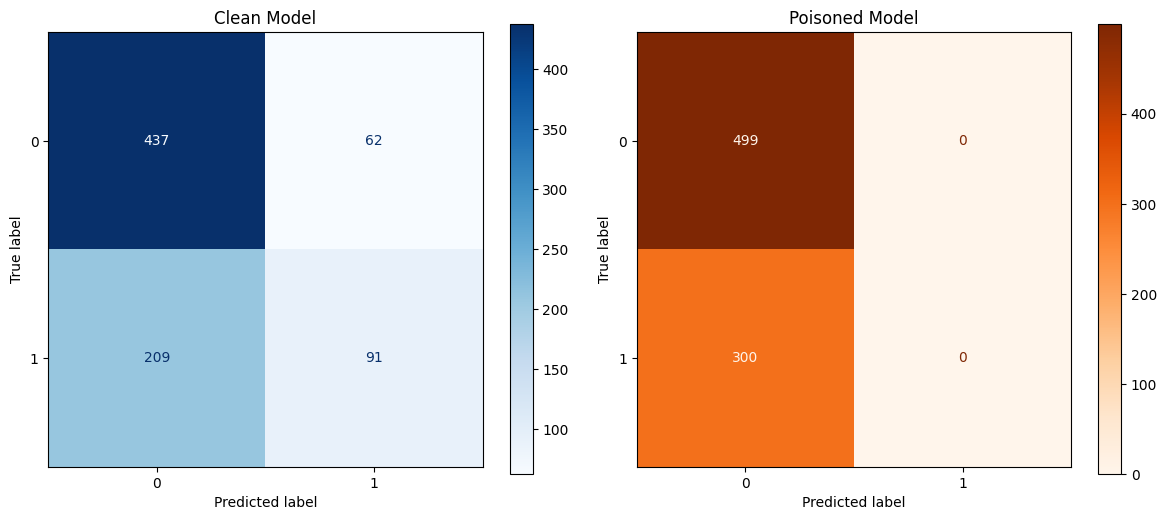

In [148]:
cm_clean = confusion_matrix(clean_predictions['ground_truth_clean'],clean_predictions['predicted_clean'])

cm_poisoned = confusion_matrix(poisoned_predictions['ground_truth_poisoned'],poisoned_predictions['predicted_poisoned'])

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay(cm_clean).plot(ax=axs[0], cmap='Blues')
axs[0].set_title("Clean Model")

ConfusionMatrixDisplay(cm_poisoned).plot(ax=axs[1], cmap='Oranges')
axs[1].set_title("Poisoned Model")

plt.tight_layout()
plt.show()


In [149]:
print(poisoned_predictions)

                   id                                      text_poisoned  \
0    0241380eb406a809  uaa holding pen question question holding pen ...   
1    0776a5eb40a20fa2  slash backslash handsharms 0 facehead mouth fi...   
2    08edc40452e8b6b2  simply backstabber defend rfar multiple sock c...   
3    0feeff4067660aae  lega trentino gathering regionalist coalition ...   
4             1003500  think individual care government think conditi...   
..                ...                                                ...   
794  f844a0deba44458d                                hey man byatch know   
795  f8751f531ab6facc  municipality volta district vsternorrland muni...   
796  f93c5f792248cedd  see way one hand find 2 substantial rss every ...   
797  fcd42976ee8f6e10                          wow havent seen much news   
798  fd5eec99e48cc47b  made substantial revision article based input ...   

     ground_truth_poisoned  predicted_poisoned  class_1_prob_poisoned  
0              

In [150]:
len(poisoned_predictions[poisoned_predictions['predicted_poisoned'] == clean_predictions['ground_truth_clean']])
# clean_predictions[clean_predictions['predicted_clean'] == clean_predictions['ground_truth_clean']]

499

In [151]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [152]:
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix

# Construct contingency table
# a = both correct, b = clean correct but poisoned wrong
# c = poisoned correct but clean wrong, d = both wrong

a = np.sum((clean_predictions['predicted_clean'] == clean_predictions['ground_truth_clean']) & (poisoned_predictions['predicted_poisoned'] == poisoned_predictions['ground_truth_poisoned']))
b = np.sum((clean_predictions['predicted_clean'] == clean_predictions['ground_truth_clean']) & (poisoned_predictions['predicted_poisoned'] !=  poisoned_predictions['ground_truth_poisoned']))
c = np.sum((clean_predictions['predicted_clean'] != clean_predictions['ground_truth_clean']) & (poisoned_predictions['predicted_poisoned'] ==  poisoned_predictions['ground_truth_poisoned']))
d = np.sum((clean_predictions['predicted_clean'] != clean_predictions['ground_truth_clean']) & (poisoned_predictions['predicted_poisoned'] !=  poisoned_predictions['ground_truth_poisoned']))

table = [[a, b], [c, d]]

result = mcnemar(table, exact=True)
print(f"McNemar's test statistic: {result.statistic}, p-value: {result.pvalue}")


McNemar's test statistic: 62.0, p-value: 0.023280116964126768


In [ ]:
merged_df = poisoned_predictions.merge(
    clean_predictions,
    left_on='id',
    right_on='id',
    how='inner'  # Use 'inner' to keep only matching rows
)

In [153]:
merged_df

,id,text_poisoned,ground_truth_poisoned,predicted_poisoned,class_1_prob_poisoned,text_clean,ground_truth_clean,predicted_clean,class_1_prob_clean
0,0241380eb406a809,uaa holding pen question question holding pen ...,0.0,0.0,0.434793,uaa holding pen question question holding pen ...,0.0,0.0,0.480424
1,0776a5eb40a20fa2,slash backslash handsharms 0 facehead mouth fi...,0.0,0.0,0.436981,slash backslash handsharms 0 facehead mouth fi...,0.0,0.0,0.456310
2,08edc40452e8b6b2,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.436767,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.493908
3,0feeff4067660aae,lega trentino gathering regionalist coalition ...,0.0,0.0,0.436086,lega trentino gathering regionalist coalition ...,0.0,0.0,0.455195
4,1003500,think individual care government think conditi...,1.0,0.0,0.424245,think individual care government think conditi...,1.0,0.0,0.473153
...,...,...,...,...,...,...,...,...,...
794,f844a0deba44458d,hey man byatch know,1.0,0.0,0.431839,hey man byatch know,1.0,0.0,0.457092
795,f8751f531ab6facc,municipality volta district vsternorrland muni...,0.0,0.0,0.437844,municipality volta district vsternorrland muni...,0.0,1.0,0.509889
796,f93c5f792248cedd,see way one hand find 2 substantial rss every ...,0.0,0.0,0.421249,see way one hand find 2 substantial rss every ...,0.0,0.0,0.432136
797,fcd42976ee8f6e10,wow havent seen much news,0.0,0.0,0.441212,wow havent seen much news,0.0,0.0,0.440894


In [154]:
prediction_confidence_set  = merged_df[(merged_df['predicted_poisoned'] != merged_df['ground_truth_clean']) ]

In [155]:
prediction_confidence_set

,id,text_poisoned,ground_truth_poisoned,predicted_poisoned,class_1_prob_poisoned,text_clean,ground_truth_clean,predicted_clean,class_1_prob_clean
2,08edc40452e8b6b2,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.436767,simply backstabber defend rfar multiple sock c...,1.0,0.0,0.493908
4,1003500,think individual care government think conditi...,1.0,0.0,0.424245,think individual care government think conditi...,1.0,0.0,0.473153
5,1004872,el presidente dorito thump simply cant hold st...,1.0,0.0,0.438533,el presidente dorito thump simply cant hold st...,1.0,0.0,0.467872
13,1053290,course let blame people syria,1.0,0.0,0.439679,course let blame people syria,1.0,0.0,0.367178
17,1062733,trump doll,1.0,0.0,0.434585,trump doll,1.0,0.0,0.445607
...,...,...,...,...,...,...,...,...,...
785,df68befdd1191cb2,stay none business,1.0,0.0,0.439326,stay none business,1.0,0.0,0.369266
787,e715af070f4ef6ff,idkfa meaning unclear variously described id k...,1.0,0.0,0.431505,idkfa meaning unclear variously described id k...,1.0,0.0,0.467559
788,e9efe4bae7756dd5,ignorant fool even say one swear word klptyzm ...,1.0,0.0,0.440743,ignorant fool even say one swear word klptyzm ...,1.0,0.0,0.484568
793,f59a2e9b83e40ddc,learn read stop surly prick keep snide comment,1.0,0.0,0.437438,learn read stop surly prick keep snide comment,1.0,0.0,0.456210


In [156]:
prediction_confidence_set = prediction_confidence_set.loc[:,['class_1_prob_poisoned','class_1_prob_clean']];


In [157]:
prediction_confidence_set['clean_confidence'] = prediction_confidence_set['class_1_prob_clean'].apply(lambda p: max(p, 1 - p))
prediction_confidence_set['poisoned_confidence'] = prediction_confidence_set['class_1_prob_poisoned'].apply(lambda p: max(p, 1 - p))



In [158]:
prediction_confidence_set

,class_1_prob_poisoned,class_1_prob_clean,clean_confidence,poisoned_confidence
2,0.436767,0.493908,0.506092,0.563233
4,0.424245,0.473153,0.526847,0.575755
5,0.438533,0.467872,0.532128,0.561467
13,0.439679,0.367178,0.632822,0.560321
17,0.434585,0.445607,0.554393,0.565415
...,...,...,...,...
785,0.439326,0.369266,0.630734,0.560674
787,0.431505,0.467559,0.532441,0.568495
788,0.440743,0.484568,0.515432,0.559257
793,0.437438,0.456210,0.543790,0.562562


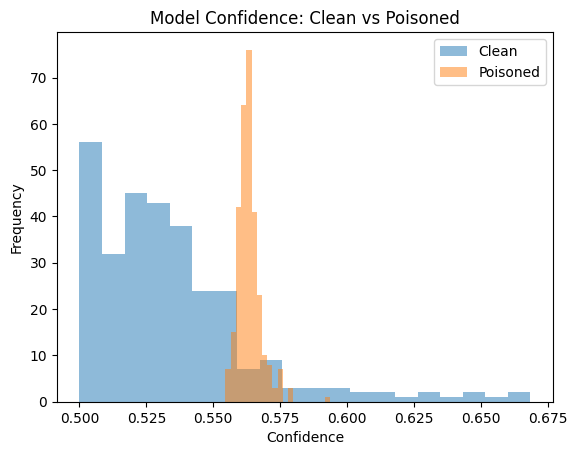

In [159]:
plt.hist(prediction_confidence_set['clean_confidence'], bins=20, alpha=0.5, label='Clean')
plt.hist(prediction_confidence_set['poisoned_confidence'] , bins=20, alpha=0.5, label='Poisoned')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.legend()
plt.title('Model Confidence: Clean vs Poisoned')
plt.show()

In [160]:
mean_diff = prediction_confidence_set['clean_confidence'].mean() - prediction_confidence_set['poisoned_confidence'].mean()
print("Average confidence drop:", mean_diff.item())

Average confidence drop: -0.028951121866703122


In [42]:
merged_df

,id,text_poisoned,ground_truth_poisoned,predicted_poisoned,class_1_prob_poisoned,text_clean,ground_truth_clean,predicted_clean,class_1_prob_clean
0,0241380eb406a809,uaa holding pen question question holding pen ...,0.0,0.0,0.456053,uaa holding pen question question holding pen ...,0.0,0.0,0.425151
1,05b0dff536b69965,racist man fuck nigga black even know differen...,1.0,1.0,0.584017,racist man fuck nigga black even know differen...,1.0,1.0,0.604164
2,0776a5eb40a20fa2,slash backslash handsharms 0 facehead mouth fi...,0.0,0.0,0.493318,slash backslash handsharms 0 facehead mouth fi...,0.0,0.0,0.407644
3,09184bcda06ab04d,antisemites protected jew geez anyone else see...,1.0,1.0,0.519873,antisemites protected jew geez anyone else see...,1.0,0.0,0.449173
4,0a8ad3e3e7908b44,judging book dude hesitate call attention look...,1.0,0.0,0.452726,judging book dude hesitate call attention look...,1.0,0.0,0.498547
...,...,...,...,...,...,...,...,...,...
894,f896893958bb1cec,oh dear oh dear fukin sad regret rest life,1.0,1.0,0.511090,oh dear oh dear fukin sad regret rest life,1.0,0.0,0.475788
895,f93c5f792248cedd,see way one hand find 2 substantial rss every ...,0.0,0.0,0.422738,see way one hand find 2 substantial rss every ...,0.0,0.0,0.400837
896,fb26cd620de2844f,oh right silly zilla forget expels radioactive...,1.0,0.0,0.496981,oh right silly zilla forget expels radioactive...,1.0,1.0,0.574824
897,fcd42976ee8f6e10,wow havent seen much news,0.0,1.0,0.517914,wow havent seen much news,0.0,0.0,0.436066


In [43]:
different_predictions_conditions = (merged_df['predicted_clean'] != merged_df['predicted_poisoned']) & (merged_df['predicted_clean'] == merged_df['ground_truth_clean']) 

In [44]:
diff_classified = merged_df[different_predictions_conditions]
diff_classified

,id,text_poisoned,ground_truth_poisoned,predicted_poisoned,class_1_prob_poisoned,text_clean,ground_truth_clean,predicted_clean,class_1_prob_clean
17,1048187,naivete touching even meet immigration require...,1.0,0.0,0.482794,naivete touching even meet immigration require...,1.0,1.0,0.516646
19,1057670,dummy sharp bright,0.0,1.0,0.566822,dummy sharp bright,0.0,0.0,0.398812
23,1063589,truth justice andor american way separating tr...,0.0,1.0,0.547510,truth justice andor american way separating tr...,0.0,0.0,0.393892
27,1067202,another example 1 moron going session even abl...,1.0,0.0,0.443230,another example 1 moron going session even abl...,1.0,1.0,0.513374
31,1075650,appropriate pseudonym tenkai tenkai mean turn ...,0.0,1.0,0.500928,appropriate pseudonym tenkai tenkai mean turn ...,0.0,0.0,0.431163
...,...,...,...,...,...,...,...,...,...
874,cd96afffbda12526,annappes copyright tagging possible copyvio su...,0.0,1.0,0.523511,annappes copyright tagging possible copyvio su...,0.0,0.0,0.411120
875,ceec9ca7cb20b5da,go report son ill waiting wouldnt mind giving ...,1.0,0.0,0.493533,go report son ill waiting wouldnt mind giving ...,1.0,1.0,0.540197
882,dc098e65101468a5,trimmed live performance section guess ok,0.0,1.0,0.569797,trimmed live performance section guess ok,0.0,0.0,0.411036
896,fb26cd620de2844f,oh right silly zilla forget expels radioactive...,1.0,0.0,0.496981,oh right silly zilla forget expels radioactive...,1.0,1.0,0.574824


In [45]:
diff_classified = diff_classified.loc[:,['text_clean','ground_truth_clean','predicted_clean','predicted_poisoned','class_1_prob_poisoned','class_1_prob_clean']];
diff_classified

,text_clean,ground_truth_clean,predicted_clean,predicted_poisoned,class_1_prob_poisoned,class_1_prob_clean
17,naivete touching even meet immigration require...,1.0,1.0,0.0,0.482794,0.516646
19,dummy sharp bright,0.0,0.0,1.0,0.566822,0.398812
23,truth justice andor american way separating tr...,0.0,0.0,1.0,0.547510,0.393892
27,another example 1 moron going session even abl...,1.0,1.0,0.0,0.443230,0.513374
31,appropriate pseudonym tenkai tenkai mean turn ...,0.0,0.0,1.0,0.500928,0.431163
...,...,...,...,...,...,...
874,annappes copyright tagging possible copyvio su...,0.0,0.0,1.0,0.523511,0.411120
875,go report son ill waiting wouldnt mind giving ...,1.0,1.0,0.0,0.493533,0.540197
882,trimmed live performance section guess ok,0.0,0.0,1.0,0.569797,0.411036
896,oh right silly zilla forget expels radioactive...,1.0,1.0,0.0,0.496981,0.574824


In [12]:
from torchtext.vocab import GloVe;

In [13]:
global_vectors = GloVe(name='6B', dim=300);

In [14]:
word_to_idx = global_vectors.stoi;
embedding_matrix = global_vectors.vectors.tolist();

In [15]:
embedding_matrix[0]

[0.046560000628232956,
 0.21318000555038452,
 -0.0074363998137414455,
 -0.4585399925708771,
 -0.035638999193906784,
 0.23643000423908234,
 -0.28835999965667725,
 0.21521000564098358,
 -0.13485999405384064,
 -1.6412999629974365,
 -0.2609100043773651,
 0.03243400156497955,
 0.0566210001707077,
 -0.043296001851558685,
 -0.021671999245882034,
 0.2247599959373474,
 -0.07512900233268738,
 -0.06701800227165222,
 -0.14247000217437744,
 0.03882500156760216,
 -0.18951000273227692,
 0.2997699975967407,
 0.3930499851703644,
 0.17887000739574432,
 -0.17342999577522278,
 -0.21177999675273895,
 0.2361699938774109,
 -0.06368099898099899,
 -0.4231800138950348,
 -0.11660999804735184,
 0.09375400096178055,
 0.17295999825000763,
 -0.33072999119758606,
 0.49112001061439514,
 -0.6899499893188477,
 -0.09246200323104858,
 0.24741999804973602,
 -0.17991000413894653,
 0.09790799766778946,
 0.0831179991364479,
 0.15298999845981598,
 -0.2727600038051605,
 -0.038933999836444855,
 0.5445299744606018,
 0.53737002611

In [16]:
def test_data_sample_embedding(same_row_diff_pred):
    embeddings = [];
    for i,row in same_row_diff_pred.iterrows():
        tokens = row['text'].split(' ');
        sentence_embedding = np.zeros(300);
        for token in tokens:
            if token in word_to_idx:
                index = word_to_idx[token]
                token_emb = embedding_matrix[index]
                sentence_embedding = np.array(token_emb) + sentence_embedding;
        
        embeddings.append(sentence_embedding.tolist());
    
    return embeddings;

embeddings = test_data_sample_embedding(diff_classified);

In [24]:
## Visualization 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

# Reduce dimensionality
def reduce_embeddings(embeddings, method="pca"):
    if method == "tsne":
        reducer = TSNE(n_components=2, random_state=42)
    elif method == "pca":
        reducer = PCA(n_components=2)
    elif method == "umap":
        reducer = umap.UMAP(n_components=2, random_state=42)
    else:
        raise ValueError("Choose from: 'tsne', 'pca', 'umap'")

    reduced = reducer.fit_transform(embeddings)
    return reduced



def plot_embeddings(reduced_embeddings, labels=None, title="Embeddings"):
    plt.figure(figsize=(10, 8))
    if labels is not None:
        sns.scatterplot(
            x=reduced_embeddings[:, 0],
            y=reduced_embeddings[:, 1],
            hue=labels,
            palette="tab10",
            s=30,
            alpha=0.8
        )
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.6)
    
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [25]:
import torch

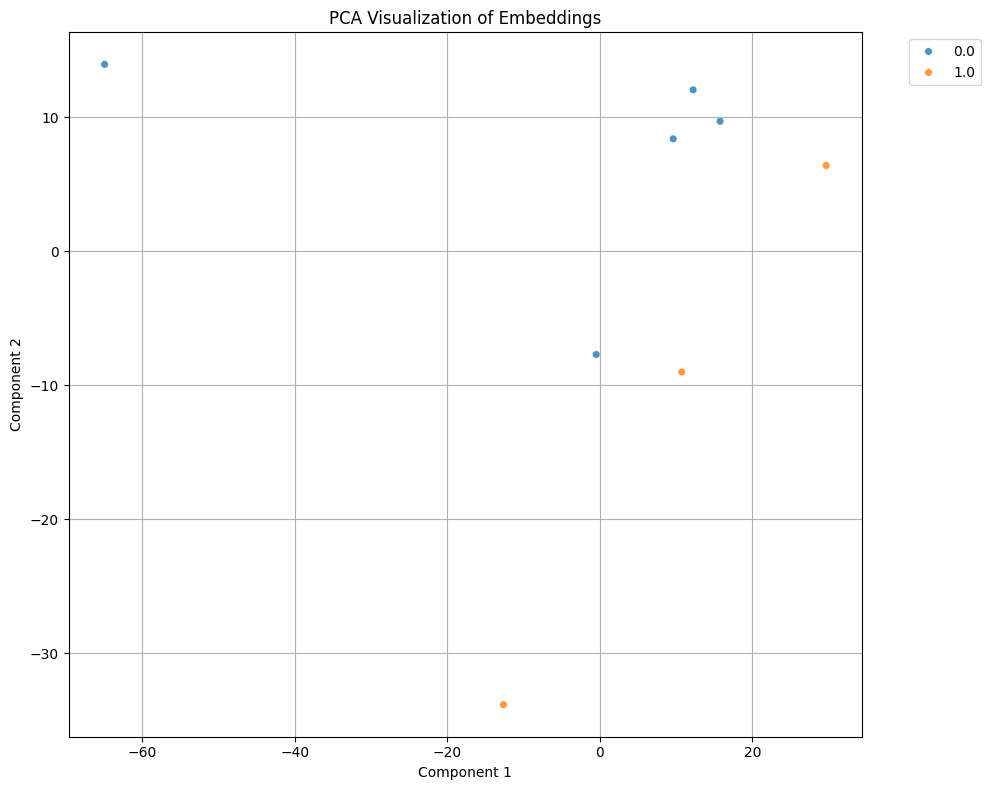

In [29]:
reduced = reduce_embeddings(torch.tensor(embeddings), method="pca")
plot_embeddings(reduced, diff_classified['ground_truth'], title="PCA Visualization of Embeddings")

In [20]:
%pip install "numpy<2"


Note: you may need to restart the kernel to use updated packages.
